# Mathematics with arrays

Now that we know how to create or import an array, we can start to do mathematics, or in our case image processing, with these arrays. The advantage of these structures is that we can do mathematics as if we were using plain numbers.

First let's import the necessary packages and images:

In [1]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
from microfilm.microplot import microshow

In [3]:
image = skimage.io.imread('../data/cellatlas/19838_1252_F8_1.tiff')

We only consider a small part of the image for the sake of simplicity:

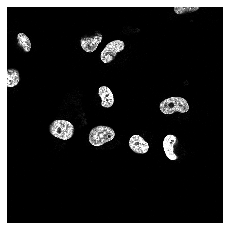

In [4]:
image_nuclei = image[:,:,2]
microshow(image_nuclei);

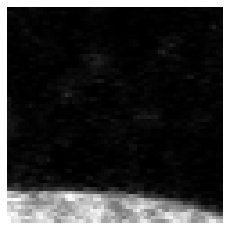

In [5]:
image_nuclei = image_nuclei[1020:1080,500:560]
microshow(image_nuclei);

## Basic calculus

For example we can write the mathematical statement $y = x + 3$, and we can write the same thing with an entire array:

In [6]:
image_nuclei_plus_three = image_nuclei + 3

In [7]:
image_nuclei

array([[  0,   0,   4, ...,   3,   3,   3],
       [ 14,  13,   6, ...,   5,   6,   5],
       [  7,   9,   9, ...,   1,   2,   5],
       ...,
       [238, 250, 240, ..., 113,  87,  65],
       [254, 229, 240, ..., 168, 151, 142],
       [255, 221, 229, ..., 233, 194, 186]], dtype=uint8)

In [8]:
image_nuclei_plus_three

array([[  3,   3,   7, ...,   6,   6,   6],
       [ 17,  16,   9, ...,   8,   9,   8],
       [ 10,  12,  12, ...,   4,   5,   8],
       ...,
       [241, 253, 243, ..., 116,  90,  68],
       [  1, 232, 243, ..., 171, 154, 145],
       [  2, 224, 232, ..., 236, 197, 189]], dtype=uint8)

We see that the statement ```image_nuclei + 3``` is turned by Numpy into "add the value 3 to each pixel in the array called ```image_nuclei```. So we don't have to explicitly add this value to each element, Numpy does it for us!

### Warning on types

We have already seen previously that we need to be careful about the type of our image and that things get complicated when we get out of the range of values of the ```dtype``` of our image. For example, let's subtract 3 from the array:

In [9]:
image_nuclei - 3

array([[253, 253,   1, ...,   0,   0,   0],
       [ 11,  10,   3, ...,   2,   3,   2],
       [  4,   6,   6, ..., 254, 255,   2],
       ...,
       [235, 247, 237, ..., 110,  84,  62],
       [251, 226, 237, ..., 165, 148, 139],
       [252, 218, 226, ..., 230, 191, 183]], dtype=uint8)

The values in the first row are not exactly what we expect. For example a pixel of value 0 has now value 253. As the allowed range of unsigned integer 8bit is 0-255, when we subtract 3 from 0, instead of getting negative values, we go back to the "other end" of the possible range and obtain 253.

To avoid this and obtain the expected results, we can simply choose a more appropriate type. The simplest is naturally to turn our integers into floats:

In [10]:
image_nuclei.astype(float) - 3

array([[ -3.,  -3.,   1., ...,   0.,   0.,   0.],
       [ 11.,  10.,   3., ...,   2.,   3.,   2.],
       [  4.,   6.,   6., ...,  -2.,  -1.,   2.],
       ...,
       [235., 247., 237., ..., 110.,  84.,  62.],
       [251., 226., 237., ..., 165., 148., 139.],
       [252., 218., 226., ..., 230., 191., 183.]])

And now we get the expected result!

Note that some operations automatically change the type of the output. For example if we divide the array, we directly get a float:

In [11]:
image_nuclei / 3

array([[ 0.        ,  0.        ,  1.33333333, ...,  1.        ,
         1.        ,  1.        ],
       [ 4.66666667,  4.33333333,  2.        , ...,  1.66666667,
         2.        ,  1.66666667],
       [ 2.33333333,  3.        ,  3.        , ...,  0.33333333,
         0.66666667,  1.66666667],
       ...,
       [79.33333333, 83.33333333, 80.        , ..., 37.66666667,
        29.        , 21.66666667],
       [84.66666667, 76.33333333, 80.        , ..., 56.        ,
        50.33333333, 47.33333333],
       [85.        , 73.66666667, 76.33333333, ..., 77.66666667,
        64.66666667, 62.        ]])

So one just has to be a bit careful with these type changes! 

Finally, you can even raise each pixel to a certain power using the normal power operator:

In [12]:
a = 3

In [13]:
a ** 2

9

In [14]:
image_nuclei**2

array([[  0,   0,  16, ...,   9,   9,   9],
       [196, 169,  36, ...,  25,  36,  25],
       [ 49,  81,  81, ...,   1,   4,  25],
       ...,
       [ 68,  36,   0, ..., 225, 145, 129],
       [  4, 217,   0, ...,  64,  17, 196],
       [  1, 201, 217, ...,  17,   4,  36]], dtype=uint8)

Again, be careful with the type:

In [15]:
image_nuclei.astype(float)**2

array([[0.0000e+00, 0.0000e+00, 1.6000e+01, ..., 9.0000e+00, 9.0000e+00,
        9.0000e+00],
       [1.9600e+02, 1.6900e+02, 3.6000e+01, ..., 2.5000e+01, 3.6000e+01,
        2.5000e+01],
       [4.9000e+01, 8.1000e+01, 8.1000e+01, ..., 1.0000e+00, 4.0000e+00,
        2.5000e+01],
       ...,
       [5.6644e+04, 6.2500e+04, 5.7600e+04, ..., 1.2769e+04, 7.5690e+03,
        4.2250e+03],
       [6.4516e+04, 5.2441e+04, 5.7600e+04, ..., 2.8224e+04, 2.2801e+04,
        2.0164e+04],
       [6.5025e+04, 4.8841e+04, 5.2441e+04, ..., 5.4289e+04, 3.7636e+04,
        3.4596e+04]])

## Numpy functions 
In addition to this simple arithmetic, we can apply **entire functions** to these arrays. In particular Numpy has a wide range of functions that take arrays as inputs. For example, we can take the cosine of each element in an image using the ```np.cos()``` function:

In [16]:
np.cos(image_nuclei)

array([[ 1.     ,  1.     , -0.654  , ..., -0.99   , -0.99   , -0.99   ],
       [ 0.1367 ,  0.907  ,  0.96   , ...,  0.2837 ,  0.96   ,  0.2837 ],
       [ 0.754  , -0.911  , -0.911  , ...,  0.5405 , -0.4163 ,  0.2837 ],
       ...,
       [ 0.724  ,  0.241  ,  0.3257 , ...,  0.995  ,  0.57   , -0.5625 ],
       [-0.892  , -0.944  ,  0.3257 , ..., -0.07513,  0.9795 , -0.809  ],
       [-0.8623 ,  0.4639 , -0.944  , ...,  0.8667 ,  0.712  , -0.7983 ]],
      dtype=float16)

We won't create an exhaustive list of functions here. If you need a specific one the simplest is just to Google using "numpy name_of_your_operation" and the corresponding documentation should appear as first link.

## Operations between arrays

Above we have only seen operations that use a *single* array and that either modified the array or calculated some statistic. But we can also **combine** arrays in different ways, for example we can add two arrays. Again the operation happens **element-wise** and because of this we have to ensure that the two arrays have the **same dimensions**. If they don't Numpy doesn't know what to do with pixels that don't have an equivalent in the other array.

As we are studying image processing, let's simulate noise in our image. We will take our ```cropped``` and add to it some noise (this is commonly done to test algorithms in degraded conditions). Let's use again Poisson noise. Now we need to make sure that we create a noise-image that has the correct dimensions. Those are:

In [17]:
image_nuclei.shape

(60, 60)

Now we can use that shape when creating the noise-array:

In [18]:
noise_image = np.random.poisson(lam=3, size=image_nuclei.shape)

Now we simply add the ```image_nuclei``` image and the ```noise_image```. First we take care of turning our array into a float:

In [19]:
image_nuclei = image_nuclei.astype(float)

corrupted = image_nuclei + 100*noise_image

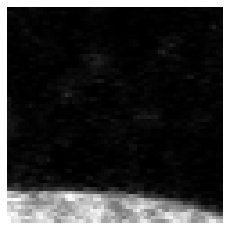

In [20]:
microshow(image_nuclei);

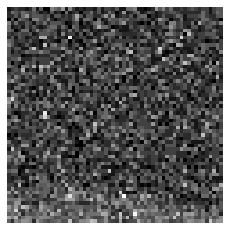

In [21]:
microshow(corrupted);

You can essentially use all common mathematical operations with arrays of same size.

## Define your own function

Just like we learned we could define a regular mathematical function such as:

In [22]:
def myfun(x):
    
    out = 3 * x ** 2
    
    return out

In [23]:
myfun(9)

243

We can do the same with entire Numpy arrays. We can even re-use the function above and apply it to an image!

In [24]:
myfun(image_nuclei)

array([[0.00000e+00, 0.00000e+00, 4.80000e+01, ..., 2.70000e+01,
        2.70000e+01, 2.70000e+01],
       [5.88000e+02, 5.07000e+02, 1.08000e+02, ..., 7.50000e+01,
        1.08000e+02, 7.50000e+01],
       [1.47000e+02, 2.43000e+02, 2.43000e+02, ..., 3.00000e+00,
        1.20000e+01, 7.50000e+01],
       ...,
       [1.69932e+05, 1.87500e+05, 1.72800e+05, ..., 3.83070e+04,
        2.27070e+04, 1.26750e+04],
       [1.93548e+05, 1.57323e+05, 1.72800e+05, ..., 8.46720e+04,
        6.84030e+04, 6.04920e+04],
       [1.95075e+05, 1.46523e+05, 1.57323e+05, ..., 1.62867e+05,
        1.12908e+05, 1.03788e+05]])

We can naturally incorporate array specific functions. For example if we need to test an algorithm and want to add different amounts of noise to an image, we can turn our few code lines from above into a function:

In [25]:
def noise_fun(im, amplitude):
    
    noise_image = np.random.poisson(lam=3, size=im.shape)
    
    im_out = im + amplitude * noise_image
    
    return im_out

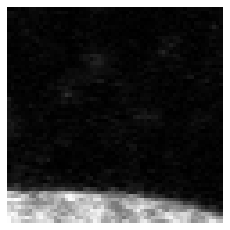

In [26]:
noisy_image = noise_fun(image_nuclei, 1)
microshow(noisy_image);

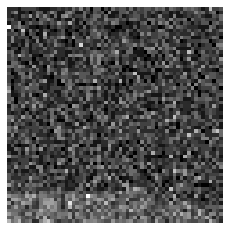

In [27]:
noisy_image = noise_fun(image_nuclei, 100)
microshow(noisy_image);

## Exercise

1. Import the image ```EmbryoTorax2D-HR.czi```
2. Extract the first channel
3. Add 1 to this first channel
4. Take the log of the result. Do you get a warning message? Do you know why?
5. Add normal noise to your image
6. Plot the result
7. Transform points 3-5 into a function